# Loading The Libraries

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')



df = pd.read_csv("IPL.csv")
df.head()

# Basic Info 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

cheaking the size of rows and columns of dataset

In [10]:
print(f'the total rows are {df.shape[0]} and total column are {df.shape[1]}')

the total rows are 74 and total column are 20


# let see how many column have null values in total

In [11]:
df.isnull().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

# SOME BASIC Questions 

1. which team won the most mathes?

Text(0.5, 1.0, 'MOST MATHC WINNERS')

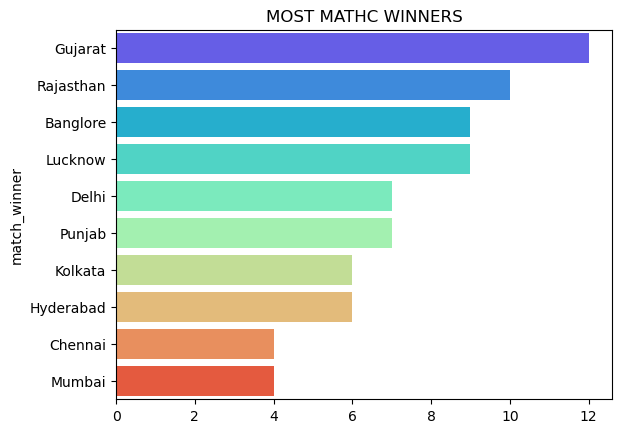

In [29]:
winners = df['match_winner'].value_counts()
sns.barplot(y = winners.index,x = winners.values,palette = 'rainbow')
plt.title("MOST MATHC WINNERS")

2. Toss Decision Trends

Text(0.5, 1.0, 'Toss Decision Trend')

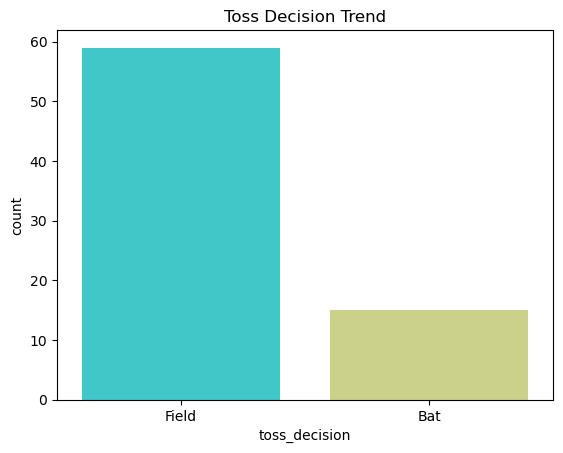

In [35]:
sns.countplot(x = df['toss_decision'],palette = "rainbow")
plt.title('Toss Decision Trend')

3. Toss Winner Vs Maths Winner 

In [51]:
df[df['toss_winner'] == df['match_winner']]['match_id'].count()
count = df[df['toss_winner'] == df['match_winner']]['match_id'].count()
percentage = (count * 100)/ df.shape[0]

In [54]:
print(f'The Chance the win mathc who win the toss is {percentage.round(2)}')

The Chance the win mathc who win the toss is 48.65


4. how do teams win?(Runs or Wickets)

Text(0.5, 1.0, 'how do teams win?(Runs or Wickets)')

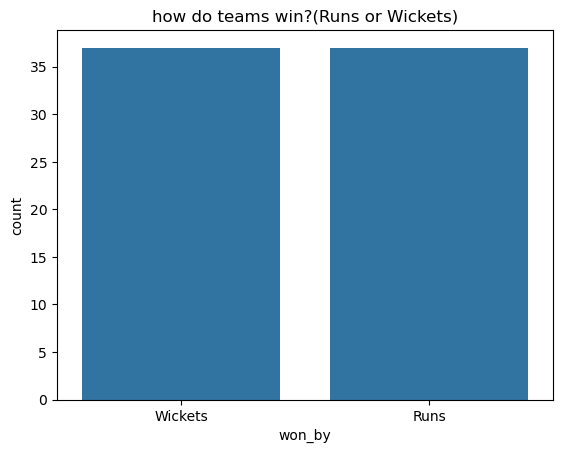

In [57]:
df.head(1)
sns.countplot(x = df['won_by'])
plt.title('how do teams win?(Runs or Wickets)')

# key players Performances

1. most "Player in the Match" Awards

Text(0.5, 1.0, 'Player in the Match')

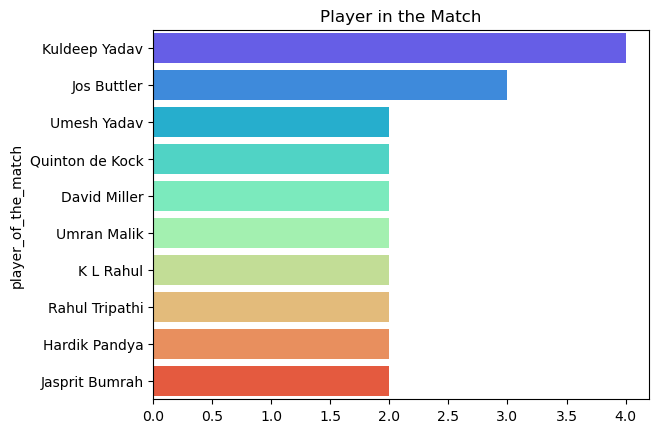

In [73]:
df.head()
most = df["player_of_the_match"].value_counts()
top_10 = most.head(10)
sns.barplot(x = top_10.values,y = top_10.index,palette = 'rainbow')
plt.title('Player in the Match')


2. top 2 Scores

<Axes: title={'center': 'Top 2 Scores'}, ylabel='top_scorer'>

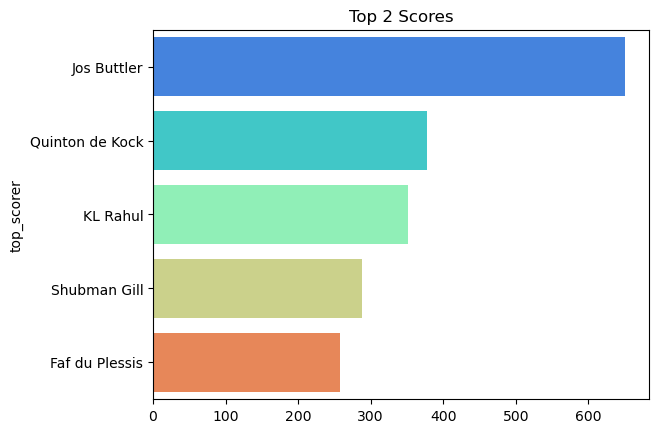

In [93]:
top = df['top_scorer'].value_counts().head(2)
sns.barplot(x = top.values , y = top.index,palette = 'rainbow')
plt.title('Top 2 Scores')

# if we want to know what is the score they do in all the matchs so -->

high = df.groupby('top_scorer')['highscore'].sum().sort_values(ascending = False).head(5)
sns.barplot(x = high.values , y = high.index,palette = 'rainbow')





10 Best bowling figures

<Axes: ylabel='best_bowling'>

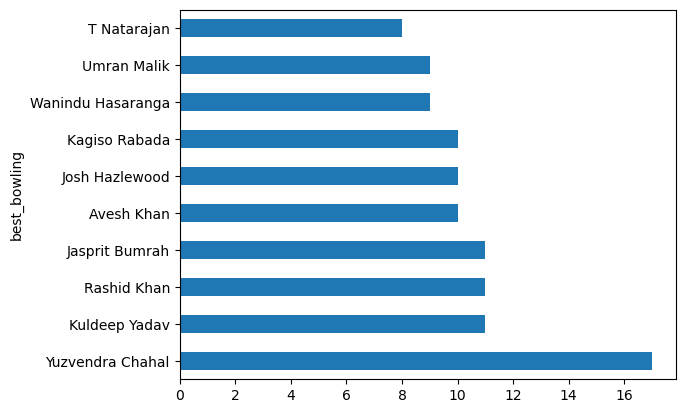

In [141]:
# first we extrac the high_wkts first using lambda fun
# making new column df['high_wkts']
df['high_wkts'] = df['best_bowling_figure'].apply(lambda x : x.split("--")[0])
df
#now new column add but it's type is Strig so we convert into Int
df['high_wkts'] = df['high_wkts'].astype(int)
top_bow = df.groupby('best_bowling')['high_wkts'].sum().sort_values(ascending=False).head(10)
top_bow.plot(kind='barh')

# venue Analysis
Most Matches Play 

<Axes: ylabel='venue'>

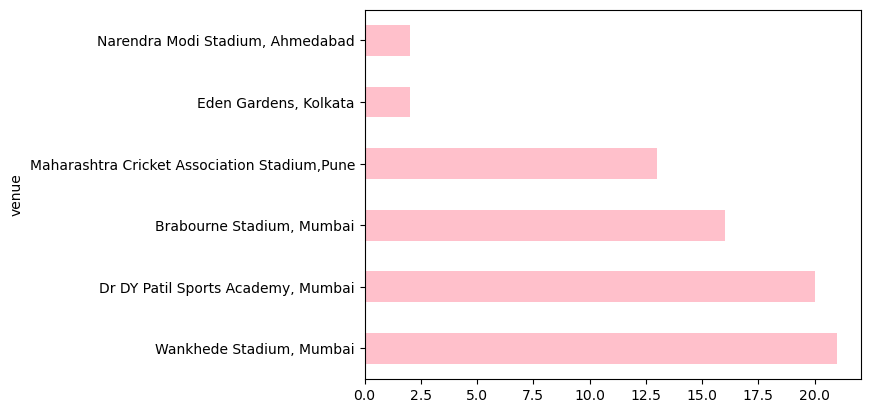

In [144]:
most = df['venue'].value_counts()
most.plot(kind = "barh" , color = 'pink')



# Custom Questions and Insights
Q1. Who won the highest margin by runs?

In [155]:
# first we know the won by only runs for that
won_run = df[df['won_by'] == 'Runs'].sort_values(by = 'margin',ascending = False).head(1)[['match_winner','margin']]
won_run


,match_winner,margin
54,Chennai,91


 Q2 Which Player Have Highest Individual Score?

In [163]:
df[df['highscore'] == df['highscore'].max()][['top_scorer','highscore']]

,top_scorer,highscore
65,Quinton de Kock,140


Q3 Which Bowler had the best bowling figures?

In [166]:
df[df['high_wkts'] == df['high_wkts'].max()][['best_bowling','best_bowling_figure']]

,best_bowling,best_bowling_figure
29,Yuzvendra Chahal,5--40
39,Umran Malik,5--25
53,Wanindu Hasaranga,5--18
55,Jasprit Bumrah,5--10
